## Load libraries

In [75]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd

# Libraries to cluster data
from sklearn.cluster import KMeans

# Libraries to visualize data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import compute_cluster_visualization, visualize_cluster  # user-defined functions

# Libraries for evaluation
from sklearn import metrics
from pyclustertend import hopkins

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [76]:
os_name = os.name

if os_name == 'nt':  
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
    
SEED = 6886
%matplotlib inline

## Import data

In [77]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
title_docs = pd.read_csv(OUTPUT_DIR + "title_docs.csv")

## Check imported data

In [78]:
title_embeddings.shape, title_docs.shape

((18992, 100), (18992, 2))

## Clustering data

In [5]:
%%time
# Test the cluster tendency of data
h_stat = hopkins(title_embeddings, title_embeddings.shape[0])
h_stat

Wall time: 1min 54s


0.06454156500874865

### K-means

In [79]:
def kmeans_clusterer(X, k, seed=SEED):
    """Generate clusters and print Silhouette metrics using Kmeans

    Args:
        X: Matrix of features
        k: Number of clusters

    Returns:
        Trained clustering model and labels based on X.
    """

    #     km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    km = KMeans(n_clusters=k, random_state=seed).fit(X)
    silhouette_score = metrics.silhouette_score(X, km.labels_)

    print(f"Number of clusters k = {k}")
    print(f"Silhouette coefficient: {silhouette_score:0.4f}")
#     print(f"Inertia: {km.inertia_}")
#     print("==========================")

    return km, km.labels_, silhouette_score, km.inertia_

In [80]:
sum_of_squared_distances = []
silho_scores = []
km_list = []
km_labels = []
k_range = list(range(2, 301))
# k_range = list(range(2,4))

start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for k in tqdm(k_range):
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clustering, cluster_labels, sil_score, inertia = kmeans_clusterer(
        X=title_embeddings,
        k=k,
        seed=SEED
    )
    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    km_list.append(clustering)
    km_labels.append(cluster_labels)
    sum_of_squared_distances.append(inertia)
    silho_scores.append(sil_score)
    print()

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

  0%|                                                                                          | 0/299 [00:00<?, ?it/s]

Start loop 2021-04-26 15:09:54.277379
Start 2021-04-26 15:09:54.279409


  0%|▎                                                                                 | 1/299 [00:07<38:39,  7.78s/it]

Number of clusters k = 2
Silhouette coefficient: 0.1244
End 2021-04-26 15:10:02.059851
Duration 0:00:07.780442

Start 2021-04-26 15:10:02.077852


  1%|▌                                                                                 | 2/299 [00:13<33:05,  6.68s/it]

Number of clusters k = 3
Silhouette coefficient: 0.1097
End 2021-04-26 15:10:07.976504
Duration 0:00:05.898652

Start 2021-04-26 15:10:07.984581


  1%|▊                                                                                 | 3/299 [00:19<31:53,  6.46s/it]

Number of clusters k = 4
Silhouette coefficient: 0.0900
End 2021-04-26 15:10:14.178984
Duration 0:00:06.194403

Start 2021-04-26 15:10:14.186034


  1%|█                                                                                 | 4/299 [00:25<29:45,  6.05s/it]

Number of clusters k = 5
Silhouette coefficient: 0.0955
End 2021-04-26 15:10:19.601198
Duration 0:00:05.415164

Start 2021-04-26 15:10:19.603198


  2%|█▎                                                                                | 5/299 [00:30<27:54,  5.70s/it]

Number of clusters k = 6
Silhouette coefficient: 0.1055
End 2021-04-26 15:10:24.668544
Duration 0:00:05.065346

Start 2021-04-26 15:10:24.669520


  2%|█▋                                                                                | 6/299 [00:35<27:25,  5.62s/it]

Number of clusters k = 7
Silhouette coefficient: 0.1138
End 2021-04-26 15:10:30.130697
Duration 0:00:05.461177

Start 2021-04-26 15:10:30.143697


  2%|█▉                                                                                | 7/299 [00:41<27:46,  5.71s/it]

Number of clusters k = 8
Silhouette coefficient: 0.1145
End 2021-04-26 15:10:36.016905
Duration 0:00:05.873208

Start 2021-04-26 15:10:36.017905


  3%|██▏                                                                               | 8/299 [00:47<27:54,  5.75s/it]

Number of clusters k = 9
Silhouette coefficient: 0.1090
End 2021-04-26 15:10:41.877518
Duration 0:00:05.859613

Start 2021-04-26 15:10:41.878518


  3%|██▍                                                                               | 9/299 [00:53<27:42,  5.73s/it]

Number of clusters k = 10
Silhouette coefficient: 0.0991
End 2021-04-26 15:10:47.558866
Duration 0:00:05.680348

Start 2021-04-26 15:10:47.559866


  3%|██▋                                                                              | 10/299 [00:59<27:44,  5.76s/it]

Number of clusters k = 11
Silhouette coefficient: 0.1229
End 2021-04-26 15:10:53.377126
Duration 0:00:05.817260

Start 2021-04-26 15:10:53.378084


  4%|██▉                                                                              | 11/299 [01:04<27:48,  5.79s/it]

Number of clusters k = 12
Silhouette coefficient: 0.1207
End 2021-04-26 15:10:59.245940
Duration 0:00:05.867856

Start 2021-04-26 15:10:59.246964


  4%|███▎                                                                             | 12/299 [01:10<27:51,  5.82s/it]

Number of clusters k = 13
Silhouette coefficient: 0.1149
End 2021-04-26 15:11:05.144094
Duration 0:00:05.897130

Start 2021-04-26 15:11:05.145094


  4%|███▌                                                                             | 13/299 [01:16<27:55,  5.86s/it]

Number of clusters k = 14
Silhouette coefficient: 0.1113
End 2021-04-26 15:11:11.084754
Duration 0:00:05.939660

Start 2021-04-26 15:11:11.085736


  5%|███▊                                                                             | 14/299 [01:23<28:56,  6.09s/it]

Number of clusters k = 15
Silhouette coefficient: 0.1224
End 2021-04-26 15:11:17.719117
Duration 0:00:06.633381

Start 2021-04-26 15:11:17.720075


  5%|████                                                                             | 15/299 [01:30<30:53,  6.53s/it]

Number of clusters k = 16
Silhouette coefficient: 0.1235
End 2021-04-26 15:11:25.244814
Duration 0:00:07.524739

Start 2021-04-26 15:11:25.245843


  5%|████▎                                                                            | 16/299 [01:38<32:07,  6.81s/it]

Number of clusters k = 17
Silhouette coefficient: 0.1210
End 2021-04-26 15:11:32.716053
Duration 0:00:07.470210

Start 2021-04-26 15:11:32.717090


  6%|████▌                                                                            | 17/299 [01:45<32:05,  6.83s/it]

Number of clusters k = 18
Silhouette coefficient: 0.1204
End 2021-04-26 15:11:39.581754
Duration 0:00:06.864664

Start 2021-04-26 15:11:39.582754


  6%|████▉                                                                            | 18/299 [01:53<33:53,  7.24s/it]

Number of clusters k = 19
Silhouette coefficient: 0.1239
End 2021-04-26 15:11:47.768303
Duration 0:00:08.185549

Start 2021-04-26 15:11:47.769302


  6%|█████▏                                                                           | 19/299 [02:01<34:43,  7.44s/it]

Number of clusters k = 20
Silhouette coefficient: 0.1317
End 2021-04-26 15:11:55.693773
Duration 0:00:07.924471

Start 2021-04-26 15:11:55.696765


  7%|█████▍                                                                           | 20/299 [02:09<35:32,  7.64s/it]

Number of clusters k = 21
Silhouette coefficient: 0.1264
End 2021-04-26 15:12:03.805522
Duration 0:00:08.108757

Start 2021-04-26 15:12:03.806563


  7%|█████▋                                                                           | 21/299 [02:18<36:40,  7.92s/it]

Number of clusters k = 22
Silhouette coefficient: 0.1278
End 2021-04-26 15:12:12.360617
Duration 0:00:08.554054

Start 2021-04-26 15:12:12.361617


  7%|█████▉                                                                           | 22/299 [02:25<36:30,  7.91s/it]

Number of clusters k = 23
Silhouette coefficient: 0.1329
End 2021-04-26 15:12:20.246898
Duration 0:00:07.885281

Start 2021-04-26 15:12:20.249899


  8%|██████▏                                                                          | 23/299 [02:33<36:12,  7.87s/it]

Number of clusters k = 24
Silhouette coefficient: 0.1359
End 2021-04-26 15:12:28.034825
Duration 0:00:07.784926

Start 2021-04-26 15:12:28.035825


  8%|██████▌                                                                          | 24/299 [02:41<36:18,  7.92s/it]

Number of clusters k = 25
Silhouette coefficient: 0.1380
End 2021-04-26 15:12:36.078026
Duration 0:00:08.042201

Start 2021-04-26 15:12:36.079025


  8%|██████▊                                                                          | 25/299 [02:49<36:04,  7.90s/it]

Number of clusters k = 26
Silhouette coefficient: 0.1342
End 2021-04-26 15:12:43.922950
Duration 0:00:07.843925

Start 2021-04-26 15:12:43.923951


  9%|███████                                                                          | 26/299 [02:57<36:19,  7.98s/it]

Number of clusters k = 27
Silhouette coefficient: 0.1422
End 2021-04-26 15:12:52.098262
Duration 0:00:08.174311

Start 2021-04-26 15:12:52.099262


  9%|███████▎                                                                         | 27/299 [03:06<36:33,  8.06s/it]

Number of clusters k = 28
Silhouette coefficient: 0.1423
End 2021-04-26 15:13:00.353605
Duration 0:00:08.254343

Start 2021-04-26 15:13:00.355567


  9%|███████▌                                                                         | 28/299 [03:14<36:33,  8.09s/it]

Number of clusters k = 29
Silhouette coefficient: 0.1450
End 2021-04-26 15:13:08.517635
Duration 0:00:08.162068

Start 2021-04-26 15:13:08.518681


 10%|███████▊                                                                         | 29/299 [03:22<37:02,  8.23s/it]

Number of clusters k = 30
Silhouette coefficient: 0.1444
End 2021-04-26 15:13:17.067504
Duration 0:00:08.548823

Start 2021-04-26 15:13:17.068504


 10%|████████▏                                                                        | 30/299 [03:31<37:20,  8.33s/it]

Number of clusters k = 31
Silhouette coefficient: 0.1457
End 2021-04-26 15:13:25.621582
Duration 0:00:08.553078

Start 2021-04-26 15:13:25.621582


 10%|████████▍                                                                        | 31/299 [03:39<37:36,  8.42s/it]

Number of clusters k = 32
Silhouette coefficient: 0.1392
End 2021-04-26 15:13:34.261692
Duration 0:00:08.640110

Start 2021-04-26 15:13:34.262693


 11%|████████▋                                                                        | 32/299 [03:48<37:45,  8.49s/it]

Number of clusters k = 33
Silhouette coefficient: 0.1440
End 2021-04-26 15:13:42.897320
Duration 0:00:08.634627

Start 2021-04-26 15:13:42.898326


 11%|████████▉                                                                        | 33/299 [03:57<38:03,  8.58s/it]

Number of clusters k = 34
Silhouette coefficient: 0.1426
End 2021-04-26 15:13:51.708211
Duration 0:00:08.809885

Start 2021-04-26 15:13:51.710198


 11%|█████████▏                                                                       | 34/299 [04:06<38:14,  8.66s/it]

Number of clusters k = 35
Silhouette coefficient: 0.1425
End 2021-04-26 15:14:00.542297
Duration 0:00:08.832099

Start 2021-04-26 15:14:00.543296


 12%|█████████▍                                                                       | 35/299 [04:15<39:08,  8.90s/it]

Number of clusters k = 36
Silhouette coefficient: 0.1508
End 2021-04-26 15:14:09.998187
Duration 0:00:09.454891

Start 2021-04-26 15:14:09.998187


 12%|█████████▊                                                                       | 36/299 [04:24<39:20,  8.97s/it]

Number of clusters k = 37
Silhouette coefficient: 0.1482
End 2021-04-26 15:14:19.151398
Duration 0:00:09.153211

Start 2021-04-26 15:14:19.152400


 12%|██████████                                                                       | 37/299 [04:34<39:47,  9.11s/it]

Number of clusters k = 38
Silhouette coefficient: 0.1534
End 2021-04-26 15:14:28.589681
Duration 0:00:09.437281

Start 2021-04-26 15:14:28.590684


 13%|██████████▎                                                                      | 38/299 [04:45<42:19,  9.73s/it]

Number of clusters k = 39
Silhouette coefficient: 0.1538
End 2021-04-26 15:14:39.754945
Duration 0:00:11.164261

Start 2021-04-26 15:14:39.755944


 13%|██████████▌                                                                      | 39/299 [04:58<46:25, 10.71s/it]

Number of clusters k = 40
Silhouette coefficient: 0.1570
End 2021-04-26 15:14:52.766673
Duration 0:00:13.010729

Start 2021-04-26 15:14:52.767675


 13%|██████████▊                                                                      | 40/299 [05:09<46:32, 10.78s/it]

Number of clusters k = 41
Silhouette coefficient: 0.1558
End 2021-04-26 15:15:03.711876
Duration 0:00:10.944201

Start 2021-04-26 15:15:03.715585


 14%|███████████                                                                      | 41/299 [05:20<47:00, 10.93s/it]

Number of clusters k = 42
Silhouette coefficient: 0.1551
End 2021-04-26 15:15:14.990881
Duration 0:00:11.275296

Start 2021-04-26 15:15:14.991881


 14%|███████████▍                                                                     | 42/299 [05:31<46:34, 10.87s/it]

Number of clusters k = 43
Silhouette coefficient: 0.1574
End 2021-04-26 15:15:25.726912
Duration 0:00:10.735031

Start 2021-04-26 15:15:25.727913


 14%|███████████▋                                                                     | 43/299 [05:43<47:54, 11.23s/it]

Number of clusters k = 44
Silhouette coefficient: 0.1591
End 2021-04-26 15:15:37.788916
Duration 0:00:12.061003

Start 2021-04-26 15:15:37.789875


 15%|███████████▉                                                                     | 44/299 [05:55<48:10, 11.33s/it]

Number of clusters k = 45
Silhouette coefficient: 0.1623
End 2021-04-26 15:15:49.363912
Duration 0:00:11.574037

Start 2021-04-26 15:15:49.364878


 15%|████████████▏                                                                    | 45/299 [06:07<49:05, 11.59s/it]

Number of clusters k = 46
Silhouette coefficient: 0.1620
End 2021-04-26 15:16:01.569720
Duration 0:00:12.204842

Start 2021-04-26 15:16:01.570723


 15%|████████████▍                                                                    | 46/299 [06:18<48:29, 11.50s/it]

Number of clusters k = 47
Silhouette coefficient: 0.1659
End 2021-04-26 15:16:12.847682
Duration 0:00:11.276959

Start 2021-04-26 15:16:12.847682


 16%|████████████▋                                                                    | 47/299 [06:30<48:17, 11.50s/it]

Number of clusters k = 48
Silhouette coefficient: 0.1659
End 2021-04-26 15:16:24.345687
Duration 0:00:11.498005

Start 2021-04-26 15:16:24.347687


 16%|█████████████                                                                    | 48/299 [06:42<48:47, 11.66s/it]

Number of clusters k = 49
Silhouette coefficient: 0.1616
End 2021-04-26 15:16:36.385688
Duration 0:00:12.038001

Start 2021-04-26 15:16:36.385688


 16%|█████████████▎                                                                   | 49/299 [06:54<49:27, 11.87s/it]

Number of clusters k = 50
Silhouette coefficient: 0.1649
End 2021-04-26 15:16:48.745592
Duration 0:00:12.359904

Start 2021-04-26 15:16:48.746593


 17%|█████████████▌                                                                   | 50/299 [07:06<49:29, 11.93s/it]

Number of clusters k = 51
Silhouette coefficient: 0.1690
End 2021-04-26 15:17:00.800704
Duration 0:00:12.054111

Start 2021-04-26 15:17:00.801675


 17%|█████████████▊                                                                   | 51/299 [07:18<49:01, 11.86s/it]

Number of clusters k = 52
Silhouette coefficient: 0.1667
End 2021-04-26 15:17:12.513670
Duration 0:00:11.711995

Start 2021-04-26 15:17:12.513670


 17%|██████████████                                                                   | 52/299 [07:31<50:32, 12.28s/it]

Number of clusters k = 53
Silhouette coefficient: 0.1669
End 2021-04-26 15:17:25.756674
Duration 0:00:13.243004

Start 2021-04-26 15:17:25.757673


 18%|██████████████▎                                                                  | 53/299 [07:44<50:39, 12.36s/it]

Number of clusters k = 54
Silhouette coefficient: 0.1730
End 2021-04-26 15:17:38.302260
Duration 0:00:12.544587

Start 2021-04-26 15:17:38.304204


 18%|██████████████▋                                                                  | 54/299 [07:57<51:39, 12.65s/it]

Number of clusters k = 55
Silhouette coefficient: 0.1762
End 2021-04-26 15:17:51.645254
Duration 0:00:13.341050

Start 2021-04-26 15:17:51.646255


 18%|██████████████▉                                                                  | 55/299 [08:10<52:00, 12.79s/it]

Number of clusters k = 56
Silhouette coefficient: 0.1732
End 2021-04-26 15:18:04.750254
Duration 0:00:13.103999

Start 2021-04-26 15:18:04.751242


 19%|███████████████▏                                                                 | 56/299 [08:23<52:25, 12.94s/it]

Number of clusters k = 57
Silhouette coefficient: 0.1731
End 2021-04-26 15:18:18.055205
Duration 0:00:13.303963

Start 2021-04-26 15:18:18.056205


 19%|███████████████▍                                                                 | 57/299 [08:36<51:55, 12.87s/it]

Number of clusters k = 58
Silhouette coefficient: 0.1699
End 2021-04-26 15:18:30.766207
Duration 0:00:12.710002

Start 2021-04-26 15:18:30.767203


 19%|███████████████▋                                                                 | 58/299 [08:49<51:56, 12.93s/it]

Number of clusters k = 59
Silhouette coefficient: 0.1763
End 2021-04-26 15:18:43.839373
Duration 0:00:13.072170

Start 2021-04-26 15:18:43.839373


 20%|███████████████▉                                                                 | 59/299 [09:03<52:33, 13.14s/it]

Number of clusters k = 60
Silhouette coefficient: 0.1767
End 2021-04-26 15:18:57.458379
Duration 0:00:13.619006

Start 2021-04-26 15:18:57.459323


 20%|████████████████▎                                                                | 60/299 [09:16<53:00, 13.31s/it]

Number of clusters k = 61
Silhouette coefficient: 0.1742
End 2021-04-26 15:19:11.158237
Duration 0:00:13.698914

Start 2021-04-26 15:19:11.159270


 20%|████████████████▌                                                                | 61/299 [09:30<52:51, 13.32s/it]

Number of clusters k = 62
Silhouette coefficient: 0.1793
End 2021-04-26 15:19:24.521287
Duration 0:00:13.362017

Start 2021-04-26 15:19:24.522233


 21%|████████████████▊                                                                | 62/299 [09:42<51:55, 13.14s/it]

Number of clusters k = 63
Silhouette coefficient: 0.1809
End 2021-04-26 15:19:37.244790
Duration 0:00:12.722557

Start 2021-04-26 15:19:37.244790


 21%|█████████████████                                                                | 63/299 [09:57<52:54, 13.45s/it]

Number of clusters k = 64
Silhouette coefficient: 0.1801
End 2021-04-26 15:19:51.409067
Duration 0:00:14.164277

Start 2021-04-26 15:19:51.410057


 21%|█████████████████▎                                                               | 64/299 [10:11<53:23, 13.63s/it]

Number of clusters k = 65
Silhouette coefficient: 0.1804
End 2021-04-26 15:20:05.472063
Duration 0:00:14.062006

Start 2021-04-26 15:20:05.473054


 22%|█████████████████▌                                                               | 65/299 [10:24<52:27, 13.45s/it]

Number of clusters k = 66
Silhouette coefficient: 0.1815
End 2021-04-26 15:20:18.498067
Duration 0:00:13.025013

Start 2021-04-26 15:20:18.499057


 22%|█████████████████▉                                                               | 66/299 [10:38<53:38, 13.82s/it]

Number of clusters k = 67
Silhouette coefficient: 0.1892
End 2021-04-26 15:20:33.162014
Duration 0:00:14.662957

Start 2021-04-26 15:20:33.163013


 22%|██████████████████▏                                                              | 67/299 [10:52<53:43, 13.89s/it]

Number of clusters k = 68
Silhouette coefficient: 0.1844
End 2021-04-26 15:20:47.243052
Duration 0:00:14.080039

Start 2021-04-26 15:20:47.244014


 23%|██████████████████▍                                                              | 68/299 [11:07<54:29, 14.15s/it]

Number of clusters k = 69
Silhouette coefficient: 0.1876
End 2021-04-26 15:21:02.002805
Duration 0:00:14.758791

Start 2021-04-26 15:21:02.003805


 23%|██████████████████▋                                                              | 69/299 [11:21<53:49, 14.04s/it]

Number of clusters k = 70
Silhouette coefficient: 0.1852
End 2021-04-26 15:21:15.779848
Duration 0:00:13.776043

Start 2021-04-26 15:21:15.780848


 23%|██████████████████▉                                                              | 70/299 [11:36<54:27, 14.27s/it]

Number of clusters k = 71
Silhouette coefficient: 0.1867
End 2021-04-26 15:21:30.577787
Duration 0:00:14.796939

Start 2021-04-26 15:21:30.578775


 24%|███████████████████▏                                                             | 71/299 [11:50<54:16, 14.28s/it]

Number of clusters k = 72
Silhouette coefficient: 0.1842
End 2021-04-26 15:21:44.893851
Duration 0:00:14.315076

Start 2021-04-26 15:21:44.894851


 24%|███████████████████▌                                                             | 72/299 [12:06<55:21, 14.63s/it]

Number of clusters k = 73
Silhouette coefficient: 0.1857
End 2021-04-26 15:22:00.341852
Duration 0:00:15.447001

Start 2021-04-26 15:22:00.342854


 24%|███████████████████▊                                                             | 73/299 [12:22<56:36, 15.03s/it]

Number of clusters k = 74
Silhouette coefficient: 0.1902
End 2021-04-26 15:22:16.300965
Duration 0:00:15.958111

Start 2021-04-26 15:22:16.301954


 25%|████████████████████                                                             | 74/299 [12:37<56:29, 15.06s/it]

Number of clusters k = 75
Silhouette coefficient: 0.1886
End 2021-04-26 15:22:31.440640
Duration 0:00:15.138686

Start 2021-04-26 15:22:31.441626


 25%|████████████████████▎                                                            | 75/299 [12:52<56:34, 15.15s/it]

Number of clusters k = 76
Silhouette coefficient: 0.1892
End 2021-04-26 15:22:46.800640
Duration 0:00:15.359014

Start 2021-04-26 15:22:46.801631


 25%|████████████████████▌                                                            | 76/299 [13:08<57:18, 15.42s/it]

Number of clusters k = 77
Silhouette coefficient: 0.1883
End 2021-04-26 15:23:02.849640
Duration 0:00:16.048009

Start 2021-04-26 15:23:02.849640


 26%|████████████████████▊                                                            | 77/299 [13:24<57:10, 15.45s/it]

Number of clusters k = 78
Silhouette coefficient: 0.1882
End 2021-04-26 15:23:18.382124
Duration 0:00:15.532484

Start 2021-04-26 15:23:18.383127


 26%|█████████████████████▏                                                           | 78/299 [13:39<57:09, 15.52s/it]

Number of clusters k = 79
Silhouette coefficient: 0.1883
End 2021-04-26 15:23:34.056074
Duration 0:00:15.672947

Start 2021-04-26 15:23:34.057073


 26%|█████████████████████▍                                                           | 79/299 [13:55<57:07, 15.58s/it]

Number of clusters k = 80
Silhouette coefficient: 0.1946
End 2021-04-26 15:23:49.773304
Duration 0:00:15.716231

Start 2021-04-26 15:23:49.774325


 27%|█████████████████████▋                                                           | 80/299 [14:11<56:51, 15.58s/it]

Number of clusters k = 81
Silhouette coefficient: 0.1972
End 2021-04-26 15:24:05.340307
Duration 0:00:15.565982

Start 2021-04-26 15:24:05.341259


 27%|█████████████████████▉                                                           | 81/299 [14:27<58:02, 15.98s/it]

Number of clusters k = 82
Silhouette coefficient: 0.1956
End 2021-04-26 15:24:22.249306
Duration 0:00:16.908047

Start 2021-04-26 15:24:22.249306


 27%|██████████████████████▏                                                          | 82/299 [14:44<58:05, 16.06s/it]

Number of clusters k = 83
Silhouette coefficient: 0.1950
End 2021-04-26 15:24:38.510261
Duration 0:00:16.260955

Start 2021-04-26 15:24:38.511257


 28%|██████████████████████▍                                                          | 83/299 [15:01<59:23, 16.50s/it]

Number of clusters k = 84
Silhouette coefficient: 0.1993
End 2021-04-26 15:24:56.018811
Duration 0:00:17.507554

Start 2021-04-26 15:24:56.019772


 28%|██████████████████████▊                                                          | 84/299 [15:18<59:27, 16.59s/it]

Number of clusters k = 85
Silhouette coefficient: 0.1993
End 2021-04-26 15:25:12.837821
Duration 0:00:16.818049

Start 2021-04-26 15:25:12.837821


 28%|███████████████████████                                                          | 85/299 [15:35<59:46, 16.76s/it]

Number of clusters k = 86
Silhouette coefficient: 0.1956
End 2021-04-26 15:25:29.990700
Duration 0:00:17.152879

Start 2021-04-26 15:25:29.991741


 29%|███████████████████████▎                                                         | 86/299 [15:51<58:49, 16.57s/it]

Number of clusters k = 87
Silhouette coefficient: 0.2025
End 2021-04-26 15:25:46.122805
Duration 0:00:16.131064

Start 2021-04-26 15:25:46.123757


 29%|███████████████████████▌                                                         | 87/299 [16:09<59:15, 16.77s/it]

Number of clusters k = 88
Silhouette coefficient: 0.1940
End 2021-04-26 15:26:03.358791
Duration 0:00:17.235034

Start 2021-04-26 15:26:03.358791


 29%|███████████████████████▊                                                         | 88/299 [16:26<59:42, 16.98s/it]

Number of clusters k = 89
Silhouette coefficient: 0.2021
End 2021-04-26 15:26:20.826757
Duration 0:00:17.467966

Start 2021-04-26 15:26:20.827785


 30%|███████████████████████▌                                                       | 89/299 [16:44<1:00:27, 17.27s/it]

Number of clusters k = 90
Silhouette coefficient: 0.1972
End 2021-04-26 15:26:38.784793
Duration 0:00:17.957008

Start 2021-04-26 15:26:38.787798


 30%|███████████████████████▊                                                       | 90/299 [17:02<1:00:25, 17.35s/it]

Number of clusters k = 91
Silhouette coefficient: 0.2024
End 2021-04-26 15:26:56.305315
Duration 0:00:17.517517

Start 2021-04-26 15:26:56.305315


 30%|████████████████████████                                                       | 91/299 [17:19<1:00:20, 17.41s/it]

Number of clusters k = 92
Silhouette coefficient: 0.2006
End 2021-04-26 15:27:13.847435
Duration 0:00:17.542120

Start 2021-04-26 15:27:13.848386


 31%|████████████████████████▎                                                      | 92/299 [17:38<1:01:15, 17.76s/it]

Number of clusters k = 93
Silhouette coefficient: 0.2036
End 2021-04-26 15:27:32.418420
Duration 0:00:18.570034

Start 2021-04-26 15:27:32.419382


 31%|████████████████████████▌                                                      | 93/299 [17:55<1:00:18, 17.56s/it]

Number of clusters k = 94
Silhouette coefficient: 0.2009
End 2021-04-26 15:27:49.538113
Duration 0:00:17.118731

Start 2021-04-26 15:27:49.539067


 31%|█████████████████████████▍                                                       | 94/299 [18:12<59:20, 17.37s/it]

Number of clusters k = 95
Silhouette coefficient: 0.2057
End 2021-04-26 15:28:06.447067
Duration 0:00:16.908000

Start 2021-04-26 15:28:06.448100


 32%|█████████████████████████▋                                                       | 95/299 [18:29<59:17, 17.44s/it]

Number of clusters k = 96
Silhouette coefficient: 0.2021
End 2021-04-26 15:28:24.047066
Duration 0:00:17.598966

Start 2021-04-26 15:28:24.047066


 32%|██████████████████████████                                                       | 96/299 [18:48<59:57, 17.72s/it]

Number of clusters k = 97
Silhouette coefficient: 0.2123
End 2021-04-26 15:28:42.426120
Duration 0:00:18.379054

Start 2021-04-26 15:28:42.427120


 32%|█████████████████████████▋                                                     | 97/299 [19:06<1:00:45, 18.04s/it]

Number of clusters k = 98
Silhouette coefficient: 0.2063
End 2021-04-26 15:29:01.229113
Duration 0:00:18.801993

Start 2021-04-26 15:29:01.230114


 33%|█████████████████████████▉                                                     | 98/299 [19:26<1:01:36, 18.39s/it]

Number of clusters k = 99
Silhouette coefficient: 0.2064
End 2021-04-26 15:29:20.433069
Duration 0:00:19.202955

Start 2021-04-26 15:29:20.434048


 33%|██████████████████████████▏                                                    | 99/299 [19:44<1:01:14, 18.37s/it]

Number of clusters k = 100
Silhouette coefficient: 0.2081
End 2021-04-26 15:29:38.756183
Duration 0:00:18.322135

Start 2021-04-26 15:29:38.757169


 33%|██████████████████████████                                                    | 100/299 [20:03<1:01:49, 18.64s/it]

Number of clusters k = 101
Silhouette coefficient: 0.2107
End 2021-04-26 15:29:58.021130
Duration 0:00:19.263961

Start 2021-04-26 15:29:58.022129


 34%|██████████████████████████▎                                                   | 101/299 [20:21<1:01:02, 18.50s/it]

Number of clusters k = 102
Silhouette coefficient: 0.2085
End 2021-04-26 15:30:16.179534
Duration 0:00:18.157405

Start 2021-04-26 15:30:16.180535


 34%|██████████████████████████▌                                                   | 102/299 [20:43<1:03:34, 19.36s/it]

Number of clusters k = 103
Silhouette coefficient: 0.2110
End 2021-04-26 15:30:37.566586
Duration 0:00:21.386051

Start 2021-04-26 15:30:37.567554


 34%|██████████████████████████▊                                                   | 103/299 [21:02<1:03:29, 19.44s/it]

Number of clusters k = 104
Silhouette coefficient: 0.2114
End 2021-04-26 15:30:57.180542
Duration 0:00:19.612988

Start 2021-04-26 15:30:57.181576


 35%|███████████████████████████▏                                                  | 104/299 [21:24<1:04:47, 19.94s/it]

Number of clusters k = 105
Silhouette coefficient: 0.2087
End 2021-04-26 15:31:18.280118
Duration 0:00:21.098542

Start 2021-04-26 15:31:18.281115


 35%|███████████████████████████▍                                                  | 105/299 [21:46<1:06:59, 20.72s/it]

Number of clusters k = 106
Silhouette coefficient: 0.2111
End 2021-04-26 15:31:40.830920
Duration 0:00:22.549805

Start 2021-04-26 15:31:40.831920


 35%|███████████████████████████▋                                                  | 106/299 [22:08<1:07:43, 21.05s/it]

Number of clusters k = 107
Silhouette coefficient: 0.2107
End 2021-04-26 15:32:02.655924
Duration 0:00:21.824004

Start 2021-04-26 15:32:02.656957


 36%|███████████████████████████▉                                                  | 107/299 [22:28<1:06:39, 20.83s/it]

Number of clusters k = 108
Silhouette coefficient: 0.2135
End 2021-04-26 15:32:22.965923
Duration 0:00:20.308966

Start 2021-04-26 15:32:22.966925


 36%|████████████████████████████▏                                                 | 108/299 [22:49<1:06:43, 20.96s/it]

Number of clusters k = 109
Silhouette coefficient: 0.2128
End 2021-04-26 15:32:44.228966
Duration 0:00:21.262041

Start 2021-04-26 15:32:44.229972


 36%|████████████████████████████▍                                                 | 109/299 [23:09<1:05:25, 20.66s/it]

Number of clusters k = 110
Silhouette coefficient: 0.2147
End 2021-04-26 15:33:04.192919
Duration 0:00:19.962947

Start 2021-04-26 15:33:04.192919


 37%|████████████████████████████▋                                                 | 110/299 [23:30<1:04:48, 20.57s/it]

Number of clusters k = 111
Silhouette coefficient: 0.2144
End 2021-04-26 15:33:24.561926
Duration 0:00:20.369007

Start 2021-04-26 15:33:24.562927


 37%|████████████████████████████▉                                                 | 111/299 [23:49<1:03:26, 20.25s/it]

Number of clusters k = 112
Silhouette coefficient: 0.2184
End 2021-04-26 15:33:44.047437
Duration 0:00:19.484510

Start 2021-04-26 15:33:44.048436


 37%|█████████████████████████████▏                                                | 112/299 [24:09<1:03:03, 20.23s/it]

Number of clusters k = 113
Silhouette coefficient: 0.2148
End 2021-04-26 15:34:04.246385
Duration 0:00:20.197949

Start 2021-04-26 15:34:04.247385


 38%|█████████████████████████████▍                                                | 113/299 [24:30<1:02:38, 20.21s/it]

Number of clusters k = 114
Silhouette coefficient: 0.2167
End 2021-04-26 15:34:24.388184
Duration 0:00:20.140799

Start 2021-04-26 15:34:24.389218


 38%|█████████████████████████████▋                                                | 114/299 [24:51<1:03:39, 20.65s/it]

Number of clusters k = 115
Silhouette coefficient: 0.2164
End 2021-04-26 15:34:46.069185
Duration 0:00:21.679967

Start 2021-04-26 15:34:46.070181


 38%|██████████████████████████████                                                | 115/299 [25:13<1:04:24, 21.00s/it]

Number of clusters k = 116
Silhouette coefficient: 0.2127
End 2021-04-26 15:35:07.896325
Duration 0:00:21.826144

Start 2021-04-26 15:35:07.897326


 39%|██████████████████████████████▎                                               | 116/299 [25:36<1:05:38, 21.52s/it]

Number of clusters k = 117
Silhouette coefficient: 0.2173
End 2021-04-26 15:35:30.628987
Duration 0:00:22.731661

Start 2021-04-26 15:35:30.629937


 39%|██████████████████████████████▌                                               | 117/299 [25:57<1:04:47, 21.36s/it]

Number of clusters k = 118
Silhouette coefficient: 0.2200
End 2021-04-26 15:35:51.607942
Duration 0:00:20.978005

Start 2021-04-26 15:35:51.608939


 39%|██████████████████████████████▊                                               | 118/299 [26:19<1:05:12, 21.62s/it]

Number of clusters k = 119
Silhouette coefficient: 0.2164
End 2021-04-26 15:36:13.824869
Duration 0:00:22.215930

Start 2021-04-26 15:36:13.826807


 40%|███████████████████████████████                                               | 119/299 [26:40<1:03:51, 21.29s/it]

Number of clusters k = 120
Silhouette coefficient: 0.2208
End 2021-04-26 15:36:34.346068
Duration 0:00:20.519261

Start 2021-04-26 15:36:34.347068


 40%|███████████████████████████████▎                                              | 120/299 [27:00<1:03:06, 21.15s/it]

Number of clusters k = 121
Silhouette coefficient: 0.2215
End 2021-04-26 15:36:55.179101
Duration 0:00:20.832033

Start 2021-04-26 15:36:55.180068


 40%|███████████████████████████████▌                                              | 121/299 [27:21<1:02:37, 21.11s/it]

Number of clusters k = 122
Silhouette coefficient: 0.2234
End 2021-04-26 15:37:16.200064
Duration 0:00:21.019996

Start 2021-04-26 15:37:16.201065


 41%|███████████████████████████████▊                                              | 122/299 [27:43<1:02:18, 21.12s/it]

Number of clusters k = 123
Silhouette coefficient: 0.2251
End 2021-04-26 15:37:37.336121
Duration 0:00:21.135056

Start 2021-04-26 15:37:37.336121


 41%|████████████████████████████████                                              | 123/299 [28:05<1:03:24, 21.62s/it]

Number of clusters k = 124
Silhouette coefficient: 0.2249
End 2021-04-26 15:38:00.117064
Duration 0:00:22.780943

Start 2021-04-26 15:38:00.118066


 41%|████████████████████████████████▎                                             | 124/299 [28:28<1:03:39, 21.83s/it]

Number of clusters k = 125
Silhouette coefficient: 0.2228
End 2021-04-26 15:38:22.437093
Duration 0:00:22.319027

Start 2021-04-26 15:38:22.438091


 42%|████████████████████████████████▌                                             | 125/299 [28:51<1:04:15, 22.16s/it]

Number of clusters k = 126
Silhouette coefficient: 0.2234
End 2021-04-26 15:38:45.359623
Duration 0:00:22.921532

Start 2021-04-26 15:38:45.360660


 42%|████████████████████████████████▊                                             | 126/299 [29:15<1:05:33, 22.73s/it]

Number of clusters k = 127
Silhouette coefficient: 0.2244
End 2021-04-26 15:39:09.442620
Duration 0:00:24.081960

Start 2021-04-26 15:39:09.443617


 42%|█████████████████████████████████▏                                            | 127/299 [29:37<1:04:38, 22.55s/it]

Number of clusters k = 128
Silhouette coefficient: 0.2271
End 2021-04-26 15:39:31.562163
Duration 0:00:22.118546

Start 2021-04-26 15:39:31.563164


 43%|█████████████████████████████████▍                                            | 128/299 [29:58<1:03:30, 22.29s/it]

Number of clusters k = 129
Silhouette coefficient: 0.2255
End 2021-04-26 15:39:53.233168
Duration 0:00:21.670004

Start 2021-04-26 15:39:53.234163


 43%|█████████████████████████████████▋                                            | 129/299 [30:22<1:03:50, 22.53s/it]

Number of clusters k = 130
Silhouette coefficient: 0.2253
End 2021-04-26 15:40:16.332220
Duration 0:00:23.098057

Start 2021-04-26 15:40:16.333164


 43%|█████████████████████████████████▉                                            | 130/299 [30:44<1:03:38, 22.60s/it]

Number of clusters k = 131
Silhouette coefficient: 0.2256
End 2021-04-26 15:40:39.087217
Duration 0:00:22.754053

Start 2021-04-26 15:40:39.087217


 44%|██████████████████████████████████▏                                           | 131/299 [31:07<1:03:35, 22.71s/it]

Number of clusters k = 132
Silhouette coefficient: 0.2307
End 2021-04-26 15:41:02.066165
Duration 0:00:22.978948

Start 2021-04-26 15:41:02.067225


 44%|██████████████████████████████████▍                                           | 132/299 [31:29<1:02:39, 22.51s/it]

Number of clusters k = 133
Silhouette coefficient: 0.2290
End 2021-04-26 15:41:24.117744
Duration 0:00:22.050519

Start 2021-04-26 15:41:24.118691


 44%|██████████████████████████████████▋                                           | 133/299 [31:52<1:02:45, 22.68s/it]

Number of clusters k = 134
Silhouette coefficient: 0.2277
End 2021-04-26 15:41:47.197697
Duration 0:00:23.079006

Start 2021-04-26 15:41:47.197697


 45%|██████████████████████████████████▉                                           | 134/299 [32:14<1:01:19, 22.30s/it]

Number of clusters k = 135
Silhouette coefficient: 0.2320
End 2021-04-26 15:42:08.602691
Duration 0:00:21.404994

Start 2021-04-26 15:42:08.603728


 45%|███████████████████████████████████▏                                          | 135/299 [32:36<1:01:04, 22.34s/it]

Number of clusters k = 136
Silhouette coefficient: 0.2305
End 2021-04-26 15:42:31.042741
Duration 0:00:22.439013

Start 2021-04-26 15:42:31.043691


 45%|███████████████████████████████████▍                                          | 136/299 [32:58<1:00:24, 22.24s/it]

Number of clusters k = 137
Silhouette coefficient: 0.2314
End 2021-04-26 15:42:53.042109
Duration 0:00:21.998418

Start 2021-04-26 15:42:53.043111


 46%|███████████████████████████████████▋                                          | 137/299 [33:23<1:01:47, 22.88s/it]

Number of clusters k = 138
Silhouette coefficient: 0.2333
End 2021-04-26 15:43:17.428110
Duration 0:00:24.384999

Start 2021-04-26 15:43:17.430111


 46%|████████████████████████████████████                                          | 138/299 [33:45<1:00:58, 22.72s/it]

Number of clusters k = 139
Silhouette coefficient: 0.2337
End 2021-04-26 15:43:39.774738
Duration 0:00:22.344627

Start 2021-04-26 15:43:39.775685


 46%|████████████████████████████████████▎                                         | 139/299 [34:09<1:01:31, 23.07s/it]

Number of clusters k = 140
Silhouette coefficient: 0.2313
End 2021-04-26 15:44:03.663185
Duration 0:00:23.887500

Start 2021-04-26 15:44:03.664131


 47%|████████████████████████████████████▌                                         | 140/299 [34:34<1:02:22, 23.54s/it]

Number of clusters k = 141
Silhouette coefficient: 0.2324
End 2021-04-26 15:44:28.281654
Duration 0:00:24.617523

Start 2021-04-26 15:44:28.282656


 47%|████████████████████████████████████▊                                         | 141/299 [34:58<1:02:57, 23.91s/it]

Number of clusters k = 142
Silhouette coefficient: 0.2318
End 2021-04-26 15:44:53.054658
Duration 0:00:24.772002

Start 2021-04-26 15:44:53.055654


 47%|█████████████████████████████████████                                         | 142/299 [35:22<1:02:31, 23.90s/it]

Number of clusters k = 143
Silhouette coefficient: 0.2352
End 2021-04-26 15:45:16.930694
Duration 0:00:23.875040

Start 2021-04-26 15:45:16.931656


 48%|█████████████████████████████████████▎                                        | 143/299 [35:47<1:02:43, 24.13s/it]

Number of clusters k = 144
Silhouette coefficient: 0.2346
End 2021-04-26 15:45:41.590221
Duration 0:00:24.658565

Start 2021-04-26 15:45:41.591169


 48%|█████████████████████████████████████▌                                        | 144/299 [36:11<1:02:21, 24.14s/it]

Number of clusters k = 145
Silhouette coefficient: 0.2384
End 2021-04-26 15:46:05.758220
Duration 0:00:24.167051

Start 2021-04-26 15:46:05.759173


 48%|█████████████████████████████████████▊                                        | 145/299 [36:34<1:00:49, 23.70s/it]

Number of clusters k = 146
Silhouette coefficient: 0.2366
End 2021-04-26 15:46:28.428759
Duration 0:00:22.669586

Start 2021-04-26 15:46:28.429733


 49%|██████████████████████████████████████                                        | 146/299 [36:57<1:00:21, 23.67s/it]

Number of clusters k = 147
Silhouette coefficient: 0.2345
End 2021-04-26 15:46:52.040767
Duration 0:00:23.611034

Start 2021-04-26 15:46:52.041719


 49%|██████████████████████████████████████▎                                       | 147/299 [37:22<1:00:34, 23.91s/it]

Number of clusters k = 148
Silhouette coefficient: 0.2373
End 2021-04-26 15:47:16.501143
Duration 0:00:24.459424

Start 2021-04-26 15:47:16.502129


 49%|██████████████████████████████████████▌                                       | 148/299 [37:49<1:02:36, 24.87s/it]

Number of clusters k = 149
Silhouette coefficient: 0.2394
End 2021-04-26 15:47:43.630131
Duration 0:00:27.128002

Start 2021-04-26 15:47:43.631141


 50%|██████████████████████████████████████▊                                       | 149/299 [38:14<1:02:38, 25.06s/it]

Number of clusters k = 150
Silhouette coefficient: 0.2383
End 2021-04-26 15:48:09.109906
Duration 0:00:25.478765

Start 2021-04-26 15:48:09.110864


 50%|███████████████████████████████████████▏                                      | 150/299 [38:41<1:03:24, 25.53s/it]

Number of clusters k = 151
Silhouette coefficient: 0.2396
End 2021-04-26 15:48:35.759187
Duration 0:00:26.648323

Start 2021-04-26 15:48:35.760134


 51%|███████████████████████████████████████▍                                      | 151/299 [39:07<1:03:13, 25.63s/it]

Number of clusters k = 152
Silhouette coefficient: 0.2421
End 2021-04-26 15:49:01.624119
Duration 0:00:25.863985

Start 2021-04-26 15:49:01.624119


 51%|███████████████████████████████████████▋                                      | 152/299 [39:34<1:04:07, 26.17s/it]

Number of clusters k = 153
Silhouette coefficient: 0.2407
End 2021-04-26 15:49:29.058660
Duration 0:00:27.434541

Start 2021-04-26 15:49:29.059662


 51%|███████████████████████████████████████▉                                      | 153/299 [40:02<1:04:33, 26.53s/it]

Number of clusters k = 154
Silhouette coefficient: 0.2373
End 2021-04-26 15:49:56.414401
Duration 0:00:27.354739

Start 2021-04-26 15:49:56.415402


 52%|████████████████████████████████████████▏                                     | 154/299 [40:28<1:03:43, 26.37s/it]

Number of clusters k = 155
Silhouette coefficient: 0.2403
End 2021-04-26 15:50:22.418448
Duration 0:00:26.003046

Start 2021-04-26 15:50:22.419452


 52%|████████████████████████████████████████▍                                     | 155/299 [40:56<1:04:25, 26.85s/it]

Number of clusters k = 156
Silhouette coefficient: 0.2424
End 2021-04-26 15:50:50.371400
Duration 0:00:27.951948

Start 2021-04-26 15:50:50.371400


 52%|████████████████████████████████████████▋                                     | 156/299 [41:22<1:03:29, 26.64s/it]

Number of clusters k = 157
Silhouette coefficient: 0.2436
End 2021-04-26 15:51:16.535450
Duration 0:00:26.164050

Start 2021-04-26 15:51:16.536397


 53%|████████████████████████████████████████▉                                     | 157/299 [41:48<1:02:40, 26.48s/it]

Number of clusters k = 158
Silhouette coefficient: 0.2435
End 2021-04-26 15:51:42.651501
Duration 0:00:26.115104

Start 2021-04-26 15:51:42.654676


 53%|█████████████████████████████████████████▏                                    | 158/299 [42:15<1:02:28, 26.59s/it]

Number of clusters k = 159
Silhouette coefficient: 0.2454
End 2021-04-26 15:52:09.475552
Duration 0:00:26.820876

Start 2021-04-26 15:52:09.476502


 53%|█████████████████████████████████████████▍                                    | 159/299 [42:42<1:02:26, 26.76s/it]

Number of clusters k = 160
Silhouette coefficient: 0.2459
End 2021-04-26 15:52:36.646505
Duration 0:00:27.170003

Start 2021-04-26 15:52:36.647502


 54%|█████████████████████████████████████████▋                                    | 160/299 [43:08<1:01:44, 26.65s/it]

Number of clusters k = 161
Silhouette coefficient: 0.2451
End 2021-04-26 15:53:03.047938
Duration 0:00:26.400436

Start 2021-04-26 15:53:03.048930


 54%|██████████████████████████████████████████                                    | 161/299 [43:35<1:01:30, 26.74s/it]

Number of clusters k = 162
Silhouette coefficient: 0.2489
End 2021-04-26 15:53:29.990924
Duration 0:00:26.941994

Start 2021-04-26 15:53:29.991924


 54%|██████████████████████████████████████████▎                                   | 162/299 [44:03<1:01:37, 26.99s/it]

Number of clusters k = 163
Silhouette coefficient: 0.2462
End 2021-04-26 15:53:57.563548
Duration 0:00:27.571624

Start 2021-04-26 15:53:57.564547


 55%|██████████████████████████████████████████▌                                   | 163/299 [44:31<1:01:47, 27.26s/it]

Number of clusters k = 164
Silhouette coefficient: 0.2425
End 2021-04-26 15:54:25.448546
Duration 0:00:27.883999

Start 2021-04-26 15:54:25.449547


 55%|██████████████████████████████████████████▊                                   | 164/299 [45:07<1:07:42, 30.09s/it]

Number of clusters k = 165
Silhouette coefficient: 0.2490
End 2021-04-26 15:55:02.147566
Duration 0:00:36.698019

Start 2021-04-26 15:55:02.148566


 55%|███████████████████████████████████████████                                   | 165/299 [45:35<1:05:42, 29.42s/it]

Number of clusters k = 166
Silhouette coefficient: 0.2512
End 2021-04-26 15:55:30.008293
Duration 0:00:27.859727

Start 2021-04-26 15:55:30.008293


 56%|███████████████████████████████████████████▎                                  | 166/299 [46:03<1:04:04, 28.91s/it]

Number of clusters k = 167
Silhouette coefficient: 0.2479
End 2021-04-26 15:55:57.719291
Duration 0:00:27.710998

Start 2021-04-26 15:55:57.720292


 56%|███████████████████████████████████████████▌                                  | 167/299 [46:30<1:02:04, 28.21s/it]

Number of clusters k = 168
Silhouette coefficient: 0.2483
End 2021-04-26 15:56:24.314287
Duration 0:00:26.593995

Start 2021-04-26 15:56:24.315327


 56%|███████████████████████████████████████████▊                                  | 168/299 [46:57<1:01:12, 28.04s/it]

Number of clusters k = 169
Silhouette coefficient: 0.2466
End 2021-04-26 15:56:51.931205
Duration 0:00:27.615878

Start 2021-04-26 15:56:51.932209


 57%|████████████████████████████████████████████                                  | 169/299 [47:25<1:00:20, 27.85s/it]

Number of clusters k = 170
Silhouette coefficient: 0.2494
End 2021-04-26 15:57:19.359089
Duration 0:00:27.426880

Start 2021-04-26 15:57:19.360040


 57%|████████████████████████████████████████████▎                                 | 170/299 [47:54<1:00:40, 28.22s/it]

Number of clusters k = 171
Silhouette coefficient: 0.2531
End 2021-04-26 15:57:48.432299
Duration 0:00:29.072259

Start 2021-04-26 15:57:48.434299


 57%|█████████████████████████████████████████████▊                                  | 171/299 [48:21<59:29, 27.89s/it]

Number of clusters k = 172
Silhouette coefficient: 0.2508
End 2021-04-26 15:58:15.556321
Duration 0:00:27.122022

Start 2021-04-26 15:58:15.557272


 58%|██████████████████████████████████████████████                                  | 172/299 [48:48<58:46, 27.77s/it]

Number of clusters k = 173
Silhouette coefficient: 0.2500
End 2021-04-26 15:58:43.032320
Duration 0:00:27.475048

Start 2021-04-26 15:58:43.033323


 58%|██████████████████████████████████████████████▎                                 | 173/299 [49:17<58:37, 27.92s/it]

Number of clusters k = 174
Silhouette coefficient: 0.2522
End 2021-04-26 15:59:11.295308
Duration 0:00:28.261985

Start 2021-04-26 15:59:11.296270


 58%|██████████████████████████████████████████████▌                                 | 174/299 [49:45<58:15, 27.97s/it]

Number of clusters k = 175
Silhouette coefficient: 0.2531
End 2021-04-26 15:59:39.384706
Duration 0:00:28.088436

Start 2021-04-26 15:59:39.385706


 59%|██████████████████████████████████████████████▊                                 | 175/299 [50:14<58:34, 28.34s/it]

Number of clusters k = 176
Silhouette coefficient: 0.2528
End 2021-04-26 16:00:08.606756
Duration 0:00:29.221050

Start 2021-04-26 16:00:08.607744


 59%|███████████████████████████████████████████████                                 | 176/299 [50:42<58:10, 28.38s/it]

Number of clusters k = 177
Silhouette coefficient: 0.2533
End 2021-04-26 16:00:37.067220
Duration 0:00:28.459476

Start 2021-04-26 16:00:37.067220


 59%|███████████████████████████████████████████████▎                                | 177/299 [51:11<58:12, 28.63s/it]

Number of clusters k = 178
Silhouette coefficient: 0.2533
End 2021-04-26 16:01:06.271237
Duration 0:00:29.204017

Start 2021-04-26 16:01:06.272236


 60%|███████████████████████████████████████████████▋                                | 178/299 [51:40<57:25, 28.48s/it]

Number of clusters k = 179
Silhouette coefficient: 0.2554
End 2021-04-26 16:01:34.401274
Duration 0:00:28.129038

Start 2021-04-26 16:01:34.402234


 60%|███████████████████████████████████████████████▉                                | 179/299 [52:08<57:05, 28.55s/it]

Number of clusters k = 180
Silhouette coefficient: 0.2536
End 2021-04-26 16:02:03.114234
Duration 0:00:28.712000

Start 2021-04-26 16:02:03.115233


 60%|████████████████████████████████████████████████▏                               | 180/299 [52:37<56:35, 28.53s/it]

Number of clusters k = 181
Silhouette coefficient: 0.2560
End 2021-04-26 16:02:31.607286
Duration 0:00:28.492053

Start 2021-04-26 16:02:31.610291


 61%|████████████████████████████████████████████████▍                               | 181/299 [53:06<56:26, 28.70s/it]

Number of clusters k = 182
Silhouette coefficient: 0.2573
End 2021-04-26 16:03:00.708234
Duration 0:00:29.097943

Start 2021-04-26 16:03:00.709271


 61%|████████████████████████████████████████████████▋                               | 182/299 [53:35<56:08, 28.79s/it]

Number of clusters k = 183
Silhouette coefficient: 0.2589
End 2021-04-26 16:03:29.710233
Duration 0:00:29.000962

Start 2021-04-26 16:03:29.710233


 61%|████████████████████████████████████████████████▉                               | 183/299 [54:05<56:07, 29.03s/it]

Number of clusters k = 184
Silhouette coefficient: 0.2576
End 2021-04-26 16:03:59.307785
Duration 0:00:29.597552

Start 2021-04-26 16:03:59.308732


 62%|█████████████████████████████████████████████████▏                              | 184/299 [54:33<55:10, 28.78s/it]

Number of clusters k = 185
Silhouette coefficient: 0.2555
End 2021-04-26 16:04:27.510792
Duration 0:00:28.202060

Start 2021-04-26 16:04:27.511792


 62%|█████████████████████████████████████████████████▍                              | 185/299 [55:02<54:43, 28.80s/it]

Number of clusters k = 186
Silhouette coefficient: 0.2564
End 2021-04-26 16:04:56.347732
Duration 0:00:28.835940

Start 2021-04-26 16:04:56.348732


 62%|█████████████████████████████████████████████████▊                              | 186/299 [55:33<55:27, 29.45s/it]

Number of clusters k = 187
Silhouette coefficient: 0.2597
End 2021-04-26 16:05:27.300774
Duration 0:00:30.952042

Start 2021-04-26 16:05:27.301732


 63%|██████████████████████████████████████████████████                              | 187/299 [56:03<55:40, 29.82s/it]

Number of clusters k = 188
Silhouette coefficient: 0.2616
End 2021-04-26 16:05:58.008783
Duration 0:00:30.707051

Start 2021-04-26 16:05:58.009733


 63%|██████████████████████████████████████████████████▎                             | 188/299 [56:33<55:00, 29.74s/it]

Number of clusters k = 189
Silhouette coefficient: 0.2590
End 2021-04-26 16:06:27.534742
Duration 0:00:29.525009

Start 2021-04-26 16:06:27.541701


 63%|██████████████████████████████████████████████████▌                             | 189/299 [57:02<54:22, 29.65s/it]

Number of clusters k = 190
Silhouette coefficient: 0.2599
End 2021-04-26 16:06:57.002363
Duration 0:00:29.460662

Start 2021-04-26 16:06:57.003346


 64%|██████████████████████████████████████████████████▊                             | 190/299 [57:33<54:23, 29.94s/it]

Number of clusters k = 191
Silhouette coefficient: 0.2600
End 2021-04-26 16:07:27.620310
Duration 0:00:30.616964

Start 2021-04-26 16:07:27.621308


 64%|███████████████████████████████████████████████████                             | 191/299 [58:08<56:52, 31.59s/it]

Number of clusters k = 192
Silhouette coefficient: 0.2580
End 2021-04-26 16:08:03.064041
Duration 0:00:35.442733

Start 2021-04-26 16:08:03.065040


 64%|███████████████████████████████████████████████████▎                            | 192/299 [58:41<56:40, 31.78s/it]

Number of clusters k = 193
Silhouette coefficient: 0.2578
End 2021-04-26 16:08:35.294042
Duration 0:00:32.229002

Start 2021-04-26 16:08:35.296038


 65%|███████████████████████████████████████████████████▋                            | 193/299 [59:11<55:42, 31.53s/it]

Number of clusters k = 194
Silhouette coefficient: 0.2602
End 2021-04-26 16:09:06.232743
Duration 0:00:30.936705

Start 2021-04-26 16:09:06.232743


 65%|███████████████████████████████████████████████████▉                            | 194/299 [59:42<54:26, 31.11s/it]

Number of clusters k = 195
Silhouette coefficient: 0.2631
End 2021-04-26 16:09:36.358741
Duration 0:00:30.125998

Start 2021-04-26 16:09:36.359741


 65%|██████████████████████████████████████████████████▊                           | 195/299 [1:00:13<54:12, 31.28s/it]

Number of clusters k = 196
Silhouette coefficient: 0.2599
End 2021-04-26 16:10:08.032748
Duration 0:00:31.673007

Start 2021-04-26 16:10:08.033744


 66%|███████████████████████████████████████████████████▏                          | 196/299 [1:00:43<52:49, 30.77s/it]

Number of clusters k = 197
Silhouette coefficient: 0.2646
End 2021-04-26 16:10:37.620778
Duration 0:00:29.587034

Start 2021-04-26 16:10:37.621779


 66%|███████████████████████████████████████████████████▍                          | 197/299 [1:01:15<52:51, 31.09s/it]

Number of clusters k = 198
Silhouette coefficient: 0.2643
End 2021-04-26 16:11:09.449590
Duration 0:00:31.827811

Start 2021-04-26 16:11:09.450553


 66%|███████████████████████████████████████████████████▋                          | 198/299 [1:01:46<52:12, 31.02s/it]

Number of clusters k = 199
Silhouette coefficient: 0.2661
End 2021-04-26 16:11:40.302603
Duration 0:00:30.852050

Start 2021-04-26 16:11:40.303552


 67%|███████████████████████████████████████████████████▉                          | 199/299 [1:02:20<53:37, 32.17s/it]

Number of clusters k = 200
Silhouette coefficient: 0.2632
End 2021-04-26 16:12:15.168556
Duration 0:00:34.865004

Start 2021-04-26 16:12:15.170553


 67%|████████████████████████████████████████████████████▏                         | 200/299 [1:02:51<52:26, 31.78s/it]

Number of clusters k = 201
Silhouette coefficient: 0.2663
End 2021-04-26 16:12:46.043969
Duration 0:00:30.873416

Start 2021-04-26 16:12:46.044959


 67%|████████████████████████████████████████████████████▍                         | 201/299 [1:03:25<52:52, 32.37s/it]

Number of clusters k = 202
Silhouette coefficient: 0.2633
End 2021-04-26 16:13:19.799687
Duration 0:00:33.754728

Start 2021-04-26 16:13:19.800638


 68%|████████████████████████████████████████████████████▋                         | 202/299 [1:04:00<53:39, 33.19s/it]

Number of clusters k = 203
Silhouette coefficient: 0.2659
End 2021-04-26 16:13:54.879638
Duration 0:00:35.079000

Start 2021-04-26 16:13:54.883637


 68%|████████████████████████████████████████████████████▉                         | 203/299 [1:04:36<54:22, 33.99s/it]

Number of clusters k = 204
Silhouette coefficient: 0.2648
End 2021-04-26 16:14:30.731751
Duration 0:00:35.848114

Start 2021-04-26 16:14:30.732750


 68%|█████████████████████████████████████████████████████▏                        | 204/299 [1:05:08<53:06, 33.54s/it]

Number of clusters k = 205
Silhouette coefficient: 0.2663
End 2021-04-26 16:15:03.239747
Duration 0:00:32.506997

Start 2021-04-26 16:15:03.242747


 69%|█████████████████████████████████████████████████████▍                        | 205/299 [1:05:41<52:06, 33.26s/it]

Number of clusters k = 206
Silhouette coefficient: 0.2679
End 2021-04-26 16:15:35.836799
Duration 0:00:32.594052

Start 2021-04-26 16:15:35.837746


 69%|█████████████████████████████████████████████████████▋                        | 206/299 [1:06:16<52:24, 33.81s/it]

Number of clusters k = 207
Silhouette coefficient: 0.2657
End 2021-04-26 16:16:10.941748
Duration 0:00:35.104002

Start 2021-04-26 16:16:10.942744


 69%|██████████████████████████████████████████████████████                        | 207/299 [1:06:50<51:45, 33.76s/it]

Number of clusters k = 208
Silhouette coefficient: 0.2680
End 2021-04-26 16:16:44.574368
Duration 0:00:33.631624

Start 2021-04-26 16:16:44.575330


 70%|██████████████████████████████████████████████████████▎                       | 208/299 [1:07:24<51:35, 34.01s/it]

Number of clusters k = 209
Silhouette coefficient: 0.2703
End 2021-04-26 16:17:19.183367
Duration 0:00:34.608037

Start 2021-04-26 16:17:19.184366


 70%|██████████████████████████████████████████████████████▌                       | 209/299 [1:08:01<52:07, 34.75s/it]

Number of clusters k = 210
Silhouette coefficient: 0.2707
End 2021-04-26 16:17:55.639554
Duration 0:00:36.455188

Start 2021-04-26 16:17:55.640554


 70%|██████████████████████████████████████████████████████▊                       | 210/299 [1:08:36<51:51, 34.96s/it]

Number of clusters k = 211
Silhouette coefficient: 0.2694
End 2021-04-26 16:18:31.111748
Duration 0:00:35.471194

Start 2021-04-26 16:18:31.112711


 71%|███████████████████████████████████████████████████████                       | 211/299 [1:09:11<51:13, 34.93s/it]

Number of clusters k = 212
Silhouette coefficient: 0.2693
End 2021-04-26 16:19:05.960710
Duration 0:00:34.847999

Start 2021-04-26 16:19:05.960710


 71%|███████████████████████████████████████████████████████▎                      | 212/299 [1:09:47<51:06, 35.24s/it]

Number of clusters k = 213
Silhouette coefficient: 0.2693
End 2021-04-26 16:19:41.934277
Duration 0:00:35.973567

Start 2021-04-26 16:19:41.935277


 71%|███████████████████████████████████████████████████████▌                      | 213/299 [1:10:25<51:42, 36.07s/it]

Number of clusters k = 214
Silhouette coefficient: 0.2733
End 2021-04-26 16:20:19.945277
Duration 0:00:38.010000

Start 2021-04-26 16:20:19.946278


 72%|███████████████████████████████████████████████████████▊                      | 214/299 [1:11:04<52:05, 36.77s/it]

Number of clusters k = 215
Silhouette coefficient: 0.2725
End 2021-04-26 16:20:58.343240
Duration 0:00:38.396962

Start 2021-04-26 16:20:58.344239


 72%|████████████████████████████████████████████████████████                      | 215/299 [1:11:43<52:47, 37.71s/it]

Number of clusters k = 216
Silhouette coefficient: 0.2689
End 2021-04-26 16:21:38.253240
Duration 0:00:39.909001

Start 2021-04-26 16:21:38.257238


 72%|████████████████████████████████████████████████████████▎                     | 216/299 [1:12:22<52:30, 37.96s/it]

Number of clusters k = 217
Silhouette coefficient: 0.2734
End 2021-04-26 16:22:16.779240
Duration 0:00:38.522002

Start 2021-04-26 16:22:16.780241


 73%|████████████████████████████████████████████████████████▌                     | 217/299 [1:13:00<51:53, 37.97s/it]

Number of clusters k = 218
Silhouette coefficient: 0.2750
End 2021-04-26 16:22:54.779796
Duration 0:00:37.999555

Start 2021-04-26 16:22:54.780789


 73%|████████████████████████████████████████████████████████▊                     | 218/299 [1:13:38<51:14, 37.95s/it]

Number of clusters k = 219
Silhouette coefficient: 0.2714
End 2021-04-26 16:23:32.690100
Duration 0:00:37.909311

Start 2021-04-26 16:23:32.691119


 73%|█████████████████████████████████████████████████████████▏                    | 219/299 [1:14:18<51:15, 38.45s/it]

Number of clusters k = 220
Silhouette coefficient: 0.2748
End 2021-04-26 16:24:12.296148
Duration 0:00:39.605029

Start 2021-04-26 16:24:12.296148


 74%|█████████████████████████████████████████████████████████▍                    | 220/299 [1:14:51<48:47, 37.06s/it]

Number of clusters k = 221
Silhouette coefficient: 0.2744
End 2021-04-26 16:24:46.107151
Duration 0:00:33.811003

Start 2021-04-26 16:24:46.108099


 74%|█████████████████████████████████████████████████████████▋                    | 221/299 [1:15:23<45:54, 35.31s/it]

Number of clusters k = 222
Silhouette coefficient: 0.2744
End 2021-04-26 16:25:17.354097
Duration 0:00:31.245998

Start 2021-04-26 16:25:17.354097


 74%|█████████████████████████████████████████████████████████▉                    | 222/299 [1:15:55<44:21, 34.57s/it]

Number of clusters k = 223
Silhouette coefficient: 0.2764
End 2021-04-26 16:25:50.191151
Duration 0:00:32.837054

Start 2021-04-26 16:25:50.192098


 75%|██████████████████████████████████████████████████████████▏                   | 223/299 [1:16:28<43:01, 33.97s/it]

Number of clusters k = 224
Silhouette coefficient: 0.2767
End 2021-04-26 16:26:22.763098
Duration 0:00:32.571000

Start 2021-04-26 16:26:22.764133


 75%|██████████████████████████████████████████████████████████▍                   | 224/299 [1:17:00<41:41, 33.35s/it]

Number of clusters k = 225
Silhouette coefficient: 0.2766
End 2021-04-26 16:26:54.667150
Duration 0:00:31.903017

Start 2021-04-26 16:26:54.668155


 75%|██████████████████████████████████████████████████████████▋                   | 225/299 [1:17:34<41:16, 33.46s/it]

Number of clusters k = 226
Silhouette coefficient: 0.2769
End 2021-04-26 16:27:28.394096
Duration 0:00:33.725941

Start 2021-04-26 16:27:28.395094


 76%|██████████████████████████████████████████████████████████▉                   | 226/299 [1:18:09<41:14, 33.90s/it]

Number of clusters k = 227
Silhouette coefficient: 0.2758
End 2021-04-26 16:28:03.313097
Duration 0:00:34.918003

Start 2021-04-26 16:28:03.315096


 76%|███████████████████████████████████████████████████████████▏                  | 227/299 [1:18:42<40:37, 33.86s/it]

Number of clusters k = 228
Silhouette coefficient: 0.2756
End 2021-04-26 16:28:37.074822
Duration 0:00:33.759726

Start 2021-04-26 16:28:37.075827


 76%|███████████████████████████████████████████████████████████▍                  | 228/299 [1:19:16<39:52, 33.69s/it]

Number of clusters k = 229
Silhouette coefficient: 0.2788
End 2021-04-26 16:29:10.387825
Duration 0:00:33.311998

Start 2021-04-26 16:29:10.388776


 77%|███████████████████████████████████████████████████████████▋                  | 229/299 [1:19:50<39:38, 33.98s/it]

Number of clusters k = 230
Silhouette coefficient: 0.2773
End 2021-04-26 16:29:45.032653
Duration 0:00:34.643877

Start 2021-04-26 16:29:45.032653


 77%|████████████████████████████████████████████████████████████                  | 230/299 [1:20:26<39:42, 34.53s/it]

Number of clusters k = 231
Silhouette coefficient: 0.2758
End 2021-04-26 16:30:20.832656
Duration 0:00:35.800003

Start 2021-04-26 16:30:20.833645


 77%|████████████████████████████████████████████████████████████▎                 | 231/299 [1:21:01<39:09, 34.56s/it]

Number of clusters k = 232
Silhouette coefficient: 0.2775
End 2021-04-26 16:30:55.463603
Duration 0:00:34.629958

Start 2021-04-26 16:30:55.464640


 78%|████████████████████████████████████████████████████████████▌                 | 232/299 [1:21:38<39:31, 35.39s/it]

Number of clusters k = 233
Silhouette coefficient: 0.2796
End 2021-04-26 16:31:32.801894
Duration 0:00:37.337254

Start 2021-04-26 16:31:32.802936


 78%|████████████████████████████████████████████████████████████▊                 | 233/299 [1:22:12<38:28, 34.98s/it]

Number of clusters k = 234
Silhouette coefficient: 0.2807
End 2021-04-26 16:32:06.818945
Duration 0:00:34.016009

Start 2021-04-26 16:32:06.819935


 78%|█████████████████████████████████████████████████████████████                 | 234/299 [1:22:46<37:42, 34.82s/it]

Number of clusters k = 235
Silhouette coefficient: 0.2821
End 2021-04-26 16:32:41.248621
Duration 0:00:34.428686

Start 2021-04-26 16:32:41.252622


 79%|█████████████████████████████████████████████████████████████▎                | 235/299 [1:23:20<36:39, 34.36s/it]

Number of clusters k = 236
Silhouette coefficient: 0.2806
End 2021-04-26 16:33:14.555622
Duration 0:00:33.303000

Start 2021-04-26 16:33:14.556621


 79%|█████████████████████████████████████████████████████████████▌                | 236/299 [1:23:53<35:48, 34.11s/it]

Number of clusters k = 237
Silhouette coefficient: 0.2802
End 2021-04-26 16:33:48.078709
Duration 0:00:33.522088

Start 2021-04-26 16:33:48.079710


 79%|█████████████████████████████████████████████████████████████▊                | 237/299 [1:24:28<35:30, 34.36s/it]

Number of clusters k = 238
Silhouette coefficient: 0.2788
End 2021-04-26 16:34:23.007868
Duration 0:00:34.928158

Start 2021-04-26 16:34:23.008856


 80%|██████████████████████████████████████████████████████████████                | 238/299 [1:25:03<35:08, 34.56s/it]

Number of clusters k = 239
Silhouette coefficient: 0.2847
End 2021-04-26 16:34:58.059229
Duration 0:00:35.050373

Start 2021-04-26 16:34:58.060230


 80%|██████████████████████████████████████████████████████████████▎               | 239/299 [1:25:39<34:46, 34.77s/it]

Number of clusters k = 240
Silhouette coefficient: 0.2806
End 2021-04-26 16:35:33.310230
Duration 0:00:35.250000

Start 2021-04-26 16:35:33.311229


 80%|██████████████████████████████████████████████████████████████▌               | 240/299 [1:26:15<34:34, 35.16s/it]

Number of clusters k = 241
Silhouette coefficient: 0.2845
End 2021-04-26 16:36:09.368228
Duration 0:00:36.056999

Start 2021-04-26 16:36:09.368228


 81%|██████████████████████████████████████████████████████████████▊               | 241/299 [1:26:50<33:56, 35.11s/it]

Number of clusters k = 242
Silhouette coefficient: 0.2824
End 2021-04-26 16:36:44.379275
Duration 0:00:35.011047

Start 2021-04-26 16:36:44.380252


 81%|███████████████████████████████████████████████████████████████▏              | 242/299 [1:27:24<33:13, 34.97s/it]

Number of clusters k = 243
Silhouette coefficient: 0.2842
End 2021-04-26 16:37:19.030264
Duration 0:00:34.650012

Start 2021-04-26 16:37:19.031228


 81%|███████████████████████████████████████████████████████████████▍              | 243/299 [1:28:02<33:33, 35.95s/it]

Number of clusters k = 244
Silhouette coefficient: 0.2843
End 2021-04-26 16:37:57.245923
Duration 0:00:38.214695

Start 2021-04-26 16:37:57.246919


 82%|███████████████████████████████████████████████████████████████▋              | 244/299 [1:28:39<33:07, 36.13s/it]

Number of clusters k = 245
Silhouette coefficient: 0.2828
End 2021-04-26 16:38:33.816875
Duration 0:00:36.569956

Start 2021-04-26 16:38:33.819873


 82%|███████████████████████████████████████████████████████████████▉              | 245/299 [1:29:16<32:39, 36.28s/it]

Number of clusters k = 246
Silhouette coefficient: 0.2831
End 2021-04-26 16:39:10.445649
Duration 0:00:36.625776

Start 2021-04-26 16:39:10.446621


 82%|████████████████████████████████████████████████████████████████▏             | 246/299 [1:29:51<31:51, 36.07s/it]

Number of clusters k = 247
Silhouette coefficient: 0.2846
End 2021-04-26 16:39:46.034246
Duration 0:00:35.587625

Start 2021-04-26 16:39:46.036241


 83%|████████████████████████████████████████████████████████████████▍             | 247/299 [1:30:27<31:12, 36.02s/it]

Number of clusters k = 248
Silhouette coefficient: 0.2829
End 2021-04-26 16:40:21.920239
Duration 0:00:35.883998

Start 2021-04-26 16:40:21.920239


 83%|████████████████████████████████████████████████████████████████▋             | 248/299 [1:31:02<30:16, 35.63s/it]

Number of clusters k = 249
Silhouette coefficient: 0.2843
End 2021-04-26 16:40:56.634020
Duration 0:00:34.713781

Start 2021-04-26 16:40:56.634020


 83%|████████████████████████████████████████████████████████████████▉             | 249/299 [1:31:40<30:17, 36.35s/it]

Number of clusters k = 250
Silhouette coefficient: 0.2878
End 2021-04-26 16:41:34.669016
Duration 0:00:38.034996

Start 2021-04-26 16:41:34.669016


 84%|█████████████████████████████████████████████████████████████████▏            | 250/299 [1:32:15<29:26, 36.05s/it]

Number of clusters k = 251
Silhouette coefficient: 0.2852
End 2021-04-26 16:42:10.011765
Duration 0:00:35.342749

Start 2021-04-26 16:42:10.011765


 84%|█████████████████████████████████████████████████████████████████▍            | 251/299 [1:32:52<29:01, 36.28s/it]

Number of clusters k = 252
Silhouette coefficient: 0.2862
End 2021-04-26 16:42:46.819764
Duration 0:00:36.807999

Start 2021-04-26 16:42:46.819764


 84%|█████████████████████████████████████████████████████████████████▋            | 252/299 [1:33:29<28:37, 36.55s/it]

Number of clusters k = 253
Silhouette coefficient: 0.2899
End 2021-04-26 16:43:24.000766
Duration 0:00:37.181002

Start 2021-04-26 16:43:24.001768


 85%|██████████████████████████████████████████████████████████████████            | 253/299 [1:34:06<28:09, 36.74s/it]

Number of clusters k = 254
Silhouette coefficient: 0.2860
End 2021-04-26 16:44:01.175456
Duration 0:00:37.173688

Start 2021-04-26 16:44:01.175456


 85%|██████████████████████████████████████████████████████████████████▎           | 254/299 [1:34:42<27:17, 36.38s/it]

Number of clusters k = 255
Silhouette coefficient: 0.2894
End 2021-04-26 16:44:36.720549
Duration 0:00:35.545093

Start 2021-04-26 16:44:36.721512


 85%|██████████████████████████████████████████████████████████████████▌           | 255/299 [1:35:18<26:33, 36.22s/it]

Number of clusters k = 256
Silhouette coefficient: 0.2873
End 2021-04-26 16:45:12.571136
Duration 0:00:35.849624

Start 2021-04-26 16:45:12.574347


 86%|██████████████████████████████████████████████████████████████████▊           | 256/299 [1:35:55<26:05, 36.40s/it]

Number of clusters k = 257
Silhouette coefficient: 0.2907
End 2021-04-26 16:45:49.399574
Duration 0:00:36.825227

Start 2021-04-26 16:45:49.402567


 86%|███████████████████████████████████████████████████████████████████           | 257/299 [1:36:32<25:40, 36.68s/it]

Number of clusters k = 258
Silhouette coefficient: 0.2905
End 2021-04-26 16:46:26.710744
Duration 0:00:37.308177

Start 2021-04-26 16:46:26.710744


 86%|███████████████████████████████████████████████████████████████████▎          | 258/299 [1:37:08<25:01, 36.62s/it]

Number of clusters k = 259
Silhouette coefficient: 0.2901
End 2021-04-26 16:47:03.188706
Duration 0:00:36.477962

Start 2021-04-26 16:47:03.189704


 87%|███████████████████████████████████████████████████████████████████▌          | 259/299 [1:37:48<25:03, 37.60s/it]

Number of clusters k = 260
Silhouette coefficient: 0.2896
End 2021-04-26 16:47:43.075383
Duration 0:00:39.885679

Start 2021-04-26 16:47:43.075383


 87%|███████████████████████████████████████████████████████████████████▊          | 260/299 [1:38:26<24:24, 37.56s/it]

Number of clusters k = 261
Silhouette coefficient: 0.2917
End 2021-04-26 16:48:20.561365
Duration 0:00:37.485982

Start 2021-04-26 16:48:20.561365


 87%|████████████████████████████████████████████████████████████████████          | 261/299 [1:39:02<23:35, 37.26s/it]

Number of clusters k = 262
Silhouette coefficient: 0.2896
End 2021-04-26 16:48:57.096335
Duration 0:00:36.534970

Start 2021-04-26 16:48:57.097332


 88%|████████████████████████████████████████████████████████████████████▎         | 262/299 [1:39:40<23:02, 37.37s/it]

Number of clusters k = 263
Silhouette coefficient: 0.2946
End 2021-04-26 16:49:34.750393
Duration 0:00:37.653061

Start 2021-04-26 16:49:34.751330


 88%|████████████████████████████████████████████████████████████████████▌         | 263/299 [1:40:17<22:23, 37.32s/it]

Number of clusters k = 264
Silhouette coefficient: 0.2906
End 2021-04-26 16:50:11.924838
Duration 0:00:37.173508

Start 2021-04-26 16:50:11.927840


 88%|████████████████████████████████████████████████████████████████████▊         | 264/299 [1:40:54<21:42, 37.23s/it]

Number of clusters k = 265
Silhouette coefficient: 0.2881
End 2021-04-26 16:50:48.944799
Duration 0:00:37.016959

Start 2021-04-26 16:50:48.945837


 89%|█████████████████████████████████████████████████████████████████████▏        | 265/299 [1:41:32<21:12, 37.41s/it]

Number of clusters k = 266
Silhouette coefficient: 0.2918
End 2021-04-26 16:51:26.790143
Duration 0:00:37.844306

Start 2021-04-26 16:51:26.791148


 89%|█████████████████████████████████████████████████████████████████████▍        | 266/299 [1:42:10<20:45, 37.73s/it]

Number of clusters k = 267
Silhouette coefficient: 0.2911
End 2021-04-26 16:52:05.263205
Duration 0:00:38.472057

Start 2021-04-26 16:52:05.264201


 89%|█████████████████████████████████████████████████████████████████████▋        | 267/299 [1:42:49<20:10, 37.83s/it]

Number of clusters k = 268
Silhouette coefficient: 0.2919
End 2021-04-26 16:52:43.331249
Duration 0:00:38.067048

Start 2021-04-26 16:52:43.331249


 90%|█████████████████████████████████████████████████████████████████████▉        | 268/299 [1:43:28<19:49, 38.38s/it]

Number of clusters k = 269
Silhouette coefficient: 0.2929
End 2021-04-26 16:53:23.003202
Duration 0:00:39.671953

Start 2021-04-26 16:53:23.004203


 90%|██████████████████████████████████████████████████████████████████████▏       | 269/299 [1:44:06<19:06, 38.20s/it]

Number of clusters k = 270
Silhouette coefficient: 0.2909
End 2021-04-26 16:54:00.777238
Duration 0:00:37.773035

Start 2021-04-26 16:54:00.778203


 90%|██████████████████████████████████████████████████████████████████████▍       | 270/299 [1:44:44<18:30, 38.29s/it]

Number of clusters k = 271
Silhouette coefficient: 0.2956
End 2021-04-26 16:54:39.269331
Duration 0:00:38.491128

Start 2021-04-26 16:54:39.272304


 91%|██████████████████████████████████████████████████████████████████████▋       | 271/299 [1:45:28<18:34, 39.81s/it]

Number of clusters k = 272
Silhouette coefficient: 0.2954
End 2021-04-26 16:55:22.646292
Duration 0:00:43.373988

Start 2021-04-26 16:55:22.647294


 91%|██████████████████████████████████████████████████████████████████████▉       | 272/299 [1:46:08<17:57, 39.92s/it]

Number of clusters k = 273
Silhouette coefficient: 0.2959
End 2021-04-26 16:56:02.801328
Duration 0:00:40.154034

Start 2021-04-26 16:56:02.803291


 91%|███████████████████████████████████████████████████████████████████████▏      | 273/299 [1:46:47<17:11, 39.66s/it]

Number of clusters k = 274
Silhouette coefficient: 0.2964
End 2021-04-26 16:56:41.878099
Duration 0:00:39.074808

Start 2021-04-26 16:56:41.879049


 92%|███████████████████████████████████████████████████████████████████████▍      | 274/299 [1:47:25<16:15, 39.02s/it]

Number of clusters k = 275
Silhouette coefficient: 0.2959
End 2021-04-26 16:57:19.389384
Duration 0:00:37.510335

Start 2021-04-26 16:57:19.390380


 92%|███████████████████████████████████████████████████████████████████████▋      | 275/299 [1:48:02<15:21, 38.41s/it]

Number of clusters k = 276
Silhouette coefficient: 0.2961
End 2021-04-26 16:57:56.381344
Duration 0:00:36.990964

Start 2021-04-26 16:57:56.382345


 92%|████████████████████████████████████████████████████████████████████████      | 276/299 [1:48:40<14:42, 38.36s/it]

Number of clusters k = 277
Silhouette coefficient: 0.2943
End 2021-04-26 16:58:34.610346
Duration 0:00:38.228001

Start 2021-04-26 16:58:34.611395


 93%|████████████████████████████████████████████████████████████████████████▎     | 277/299 [1:49:21<14:21, 39.14s/it]

Number of clusters k = 278
Silhouette coefficient: 0.2961
End 2021-04-26 16:59:15.594379
Duration 0:00:40.982984

Start 2021-04-26 16:59:15.595384


 93%|████████████████████████████████████████████████████████████████████████▌     | 278/299 [1:49:59<13:34, 38.79s/it]

Number of clusters k = 279
Silhouette coefficient: 0.3005
End 2021-04-26 16:59:53.548381
Duration 0:00:37.952997

Start 2021-04-26 16:59:53.550379


 93%|████████████████████████████████████████████████████████████████████████▊     | 279/299 [1:50:38<12:56, 38.84s/it]

Number of clusters k = 280
Silhouette coefficient: 0.2973
End 2021-04-26 17:00:32.522392
Duration 0:00:38.972013

Start 2021-04-26 17:00:32.522392


 94%|█████████████████████████████████████████████████████████████████████████     | 280/299 [1:51:18<12:26, 39.31s/it]

Number of clusters k = 281
Silhouette coefficient: 0.2986
End 2021-04-26 17:01:12.928127
Duration 0:00:40.405735

Start 2021-04-26 17:01:12.929128


 94%|█████████████████████████████████████████████████████████████████████████▎    | 281/299 [1:51:56<11:40, 38.93s/it]

Number of clusters k = 282
Silhouette coefficient: 0.2993
End 2021-04-26 17:01:50.968091
Duration 0:00:38.038963

Start 2021-04-26 17:01:50.968091


 94%|█████████████████████████████████████████████████████████████████████████▌    | 282/299 [1:52:35<10:59, 38.78s/it]

Number of clusters k = 283
Silhouette coefficient: 0.2992
End 2021-04-26 17:02:29.391805
Duration 0:00:38.423714

Start 2021-04-26 17:02:29.392805


 95%|█████████████████████████████████████████████████████████████████████████▊    | 283/299 [1:53:15<10:29, 39.33s/it]

Number of clusters k = 284
Silhouette coefficient: 0.2993
End 2021-04-26 17:03:09.991802
Duration 0:00:40.598997

Start 2021-04-26 17:03:09.992803


 95%|██████████████████████████████████████████████████████████████████████████    | 284/299 [1:53:55<09:53, 39.54s/it]

Number of clusters k = 285
Silhouette coefficient: 0.3006
End 2021-04-26 17:03:50.022804
Duration 0:00:40.030001

Start 2021-04-26 17:03:50.023803


 95%|██████████████████████████████████████████████████████████████████████████▎   | 285/299 [1:54:37<09:23, 40.24s/it]

Number of clusters k = 286
Silhouette coefficient: 0.2983
End 2021-04-26 17:04:31.887844
Duration 0:00:41.864041

Start 2021-04-26 17:04:31.888804


 96%|██████████████████████████████████████████████████████████████████████████▌   | 286/299 [1:55:16<08:37, 39.84s/it]

Number of clusters k = 287
Silhouette coefficient: 0.2974
End 2021-04-26 17:05:10.809856
Duration 0:00:38.921052

Start 2021-04-26 17:05:10.810803


 96%|██████████████████████████████████████████████████████████████████████████▊   | 287/299 [1:55:57<08:03, 40.28s/it]

Number of clusters k = 288
Silhouette coefficient: 0.2995
End 2021-04-26 17:05:52.125855
Duration 0:00:41.315052

Start 2021-04-26 17:05:52.126838


 96%|███████████████████████████████████████████████████████████████████████████▏  | 288/299 [1:56:37<07:20, 40.07s/it]

Number of clusters k = 289
Silhouette coefficient: 0.2998
End 2021-04-26 17:06:31.684802
Duration 0:00:39.557964

Start 2021-04-26 17:06:31.684802


 97%|███████████████████████████████████████████████████████████████████████████▍  | 289/299 [1:57:17<06:39, 39.99s/it]

Number of clusters k = 290
Silhouette coefficient: 0.2997
End 2021-04-26 17:07:11.513754
Duration 0:00:39.828952

Start 2021-04-26 17:07:11.514797


 97%|███████████████████████████████████████████████████████████████████████████▋  | 290/299 [1:57:56<05:57, 39.77s/it]

Number of clusters k = 291
Silhouette coefficient: 0.3025
End 2021-04-26 17:07:50.763805
Duration 0:00:39.249008

Start 2021-04-26 17:07:50.764792


 97%|███████████████████████████████████████████████████████████████████████████▉  | 291/299 [1:58:36<05:19, 39.97s/it]

Number of clusters k = 292
Silhouette coefficient: 0.3018
End 2021-04-26 17:08:31.181252
Duration 0:00:40.416460

Start 2021-04-26 17:08:31.183199


 98%|████████████████████████████████████████████████████████████████████████████▏ | 292/299 [1:59:18<04:44, 40.57s/it]

Number of clusters k = 293
Silhouette coefficient: 0.3037
End 2021-04-26 17:09:13.172199
Duration 0:00:41.989000

Start 2021-04-26 17:09:13.173198


 98%|████████████████████████████████████████████████████████████████████████████▍ | 293/299 [2:00:01<04:07, 41.18s/it]

Number of clusters k = 294
Silhouette coefficient: 0.3022
End 2021-04-26 17:09:55.768239
Duration 0:00:42.595041

Start 2021-04-26 17:09:55.769236


 98%|████████████████████████████████████████████████████████████████████████████▋ | 294/299 [2:00:44<03:27, 41.60s/it]

Number of clusters k = 295
Silhouette coefficient: 0.3016
End 2021-04-26 17:10:38.338251
Duration 0:00:42.569015

Start 2021-04-26 17:10:38.339199


 99%|████████████████████████████████████████████████████████████████████████████▉ | 295/299 [2:01:26<02:47, 41.75s/it]

Number of clusters k = 296
Silhouette coefficient: 0.3022
End 2021-04-26 17:11:20.460795
Duration 0:00:42.121596

Start 2021-04-26 17:11:20.461794


 99%|█████████████████████████████████████████████████████████████████████████████▏| 296/299 [2:02:10<02:07, 42.66s/it]

Number of clusters k = 297
Silhouette coefficient: 0.3035
End 2021-04-26 17:12:05.223824
Duration 0:00:44.762030

Start 2021-04-26 17:12:05.224823


 99%|█████████████████████████████████████████████████████████████████████████████▍| 297/299 [2:02:53<01:24, 42.48s/it]

Number of clusters k = 298
Silhouette coefficient: 0.3035
End 2021-04-26 17:12:47.297666
Duration 0:00:42.072843

Start 2021-04-26 17:12:47.300664


100%|█████████████████████████████████████████████████████████████████████████████▋| 298/299 [2:03:36<00:42, 42.65s/it]

Number of clusters k = 299
Silhouette coefficient: 0.3069
End 2021-04-26 17:13:30.331704
Duration 0:00:43.031040

Start 2021-04-26 17:13:30.332703


100%|██████████████████████████████████████████████████████████████████████████████| 299/299 [2:04:17<00:00, 24.94s/it]

Number of clusters k = 300
Silhouette coefficient: 0.3036
End 2021-04-26 17:14:11.634593
Duration 0:00:41.301890

End loop 2021-04-26 17:14:11.671596
Duration 2:04:17.394217


## Evaluate cluster performance

In [81]:
# Calculate evaluation metrics
X = title_embeddings
calhar_scores = []
davbou_scores = []

for i in tqdm(range(len(km_labels))):
    cluster_labels = km_labels[i]
    k = k_range[i]
    try:
        ch_score = metrics.calinski_harabasz_score(X, cluster_labels)
    except Exception as error:
        ch_score = -2
        print(f'Error in calculating Calinski Harabasz Score with k = {str(k)}: {error}')
    try:
        db_score = metrics.davies_bouldin_score(X, cluster_labels)
    except Exception as error:
        db_score = -2
        print(f'Error in calculating Davies-Bouldin Score with k = {str(k)}: {error}')
        
    calhar_scores.append(ch_score)
    davbou_scores.append(db_score)

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [00:31<00:00,  9.61it/s]


#### Inertia

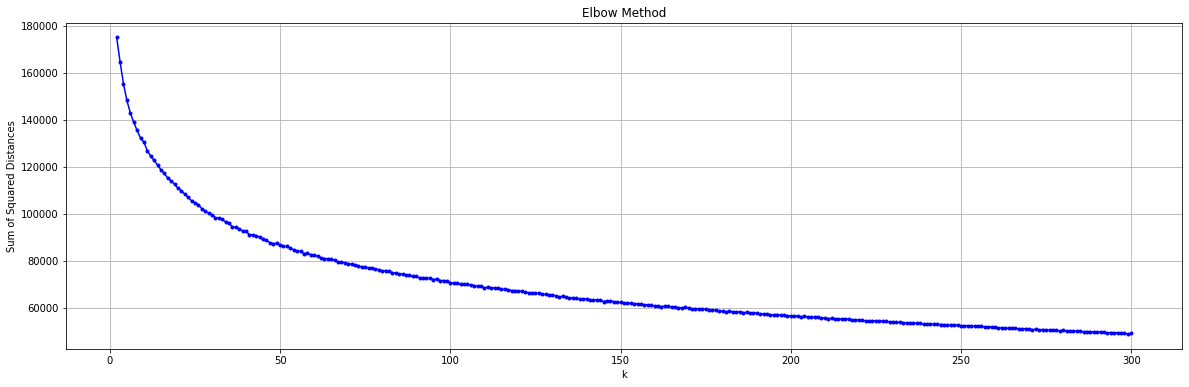

In [82]:
plt.figure(figsize=(20, 6))
plt.plot(k_range, sum_of_squared_distances, "b.-")
plt.xlabel("k")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### Silhoulette score

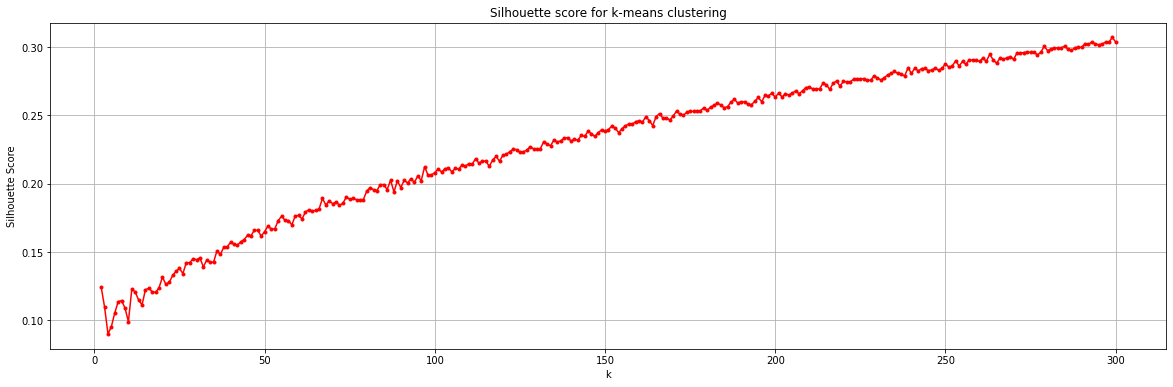

In [83]:
plt.figure(figsize=(20, 6))
plt.plot(k_range, silho_scores, "r.-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for k-means clustering")
plt.grid()
plt.show()

#### Calinski Harabasz Score

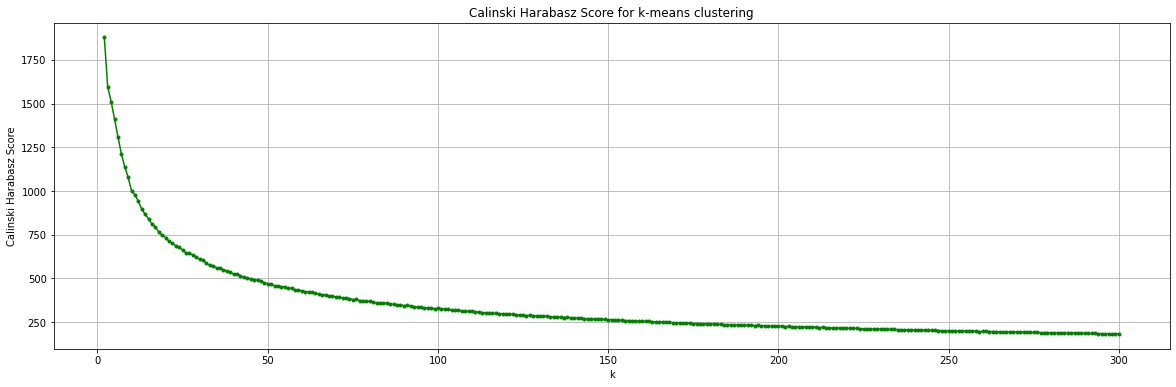

In [84]:
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(k_range, calhar_scores, "g.-")
plt.xlabel("k")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Score for k-means clustering")
plt.grid()
plt.show()

#### Davies-Bouldin Score

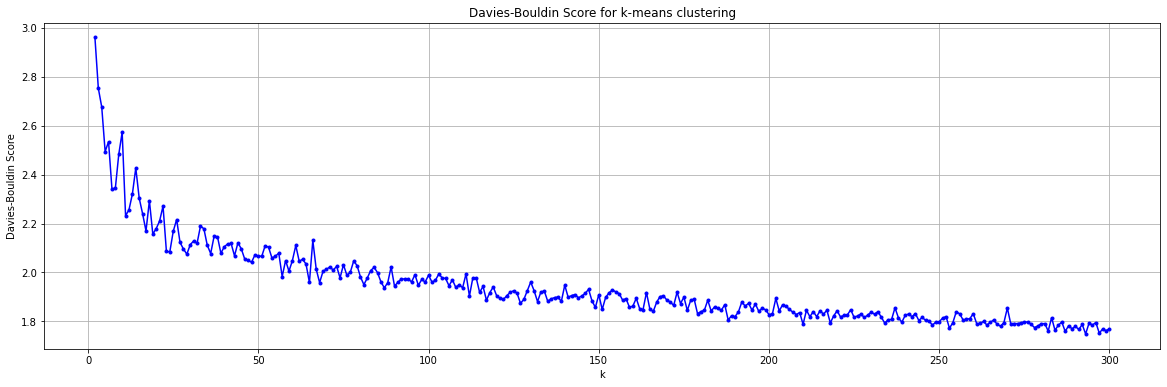

In [85]:
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(k_range, davbou_scores, "b.-")
plt.xlabel("k")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Score for k-means clustering")
plt.grid()
plt.show()

## Visualize clusters

In [86]:
X = title_embeddings

bestkm_index = np.argmax(silho_scores)
# print(bestkm_index)

bestkm_k = k_range[bestkm_index]
print(f'Optimal k = {bestkm_k}')

bestkm_labels = km_labels[bestkm_index]
# bestkm_centroids = km_list[bestkm_index].cluster_centers_

Optimal k = 299


In [64]:
# Compute PCA and t-SNE components
pca_datapoint, tsne_datapoint = compute_cluster_visualization(
    X, pca=True, tsne=True, seed=SEED
)

Start t-SNE 2021-04-25 19:00:51.733008
End t-SNE 2021-04-25 19:02:29.021922
t-SNE duration 0:01:37.288914


In [ ]:
# Save PCA and t-SNE data points to numpy file
np.save(OUTPUT_DIR + "pca_datapoints", pca_datapoint)
np.save(OUTPUT_DIR + "tsne_datapoints", tsne_datapoint)

In [87]:
pca_datapoint = np.load(OUTPUT_DIR + "pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "tsne_datapoints.npy")

In [73]:
# import cluster_visualization_helper
# importlib.reload(cluster_visualization_helper)
# from cluster_visualization_helper import visualize_cluster

Start PCA 2021-04-26 17:23:59.868774
End PCA 2021-04-26 17:23:59.872772
PCA duration 0:00:00.003998

Start t-SNE 2021-04-26 17:23:59.872772
End t-SNE 2021-04-26 17:23:59.877774
t-SNE duration 0:00:00.005002

Wall time: 51 ms


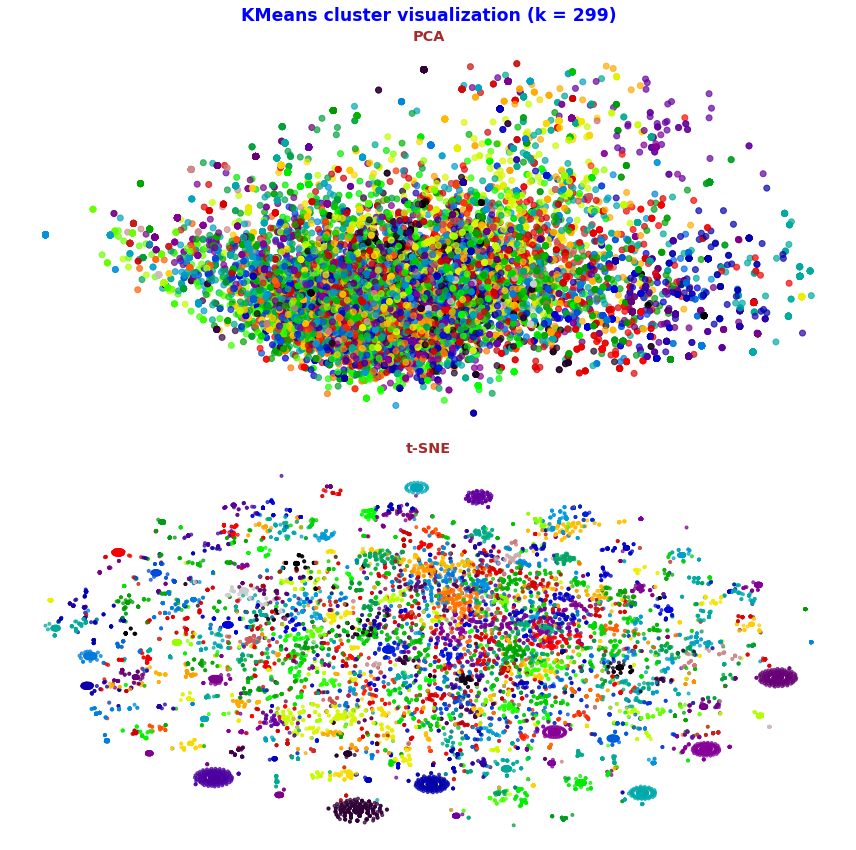

In [97]:
%%time
plot_title = f"KMeans cluster visualization (k = {bestkm_k})"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(bestkm_labels.astype(float) / bestkm_k)

# Visualize clusters with PCA and t-SNE
visualize_cluster(plot_title, (12,12), colors, palette, pca_datapoint, tsne_datapoint, pca=True, tsne=True)

## Save cluster results to file

In [89]:
df_clusters = pd.DataFrame(
    {
        "text": title_docs["job_title"].values.tolist(),
        "tokens": title_docs["clean_job_title"].values.tolist(),
        "cluster": km_labels[bestkm_index]
    }
)

In [90]:
df_clusters

,text,tokens,cluster
0,Chief Financial Officer,"['chief', 'financial', 'officer']",99
1,Full-time Community Connections Intern (paid i...,"['full', 'time', 'community', 'connection', 'i...",239
2,Country Coordinator,"['country', 'coordinator']",161
3,BCC Specialist,"['bcc', 'specialist']",277
4,Software Developer,"['software', 'developer']",104
...,...,...,...
18987,Senior Creative UX/ UI Designer,"['senior', 'creative', 'ux', 'ui', 'designer']",258
18988,Category Development Manager,"['category', 'development', 'manager']",229
18989,Operational Marketing Manager,"['operational', 'marketing', 'manager']",111
18990,Head of Online Sales Department,"['head', 'online', 'sale', 'department']",222


In [91]:
# df_clusters.loc[df_clusters['cluster'] == 100]

In [92]:
df_clusters.to_csv(OUTPUT_DIR + "job-title-clusters_kmeans.csv", index=False)